<a href="https://colab.research.google.com/github/elqvixote/accidentes-trabajo-en-peru/blob/main/proyectoCFv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Accidentabilidad en Perú a Partir de Datos del Ministerio del Trabajo

# ELT

In [ ]:
import os
import zipfile
from pathlib import Path
from datetime import datetime
import numpy as np
import pandas as pd
import altair as alt
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm
print('Setup Ready')

Setup Ready


In [ ]:
%pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install mapclassify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:
import mapclassify

In [ ]:
url_dados2 = "https://www2.trabajo.gob.pe/estadisticas/estadisticas-accidentes-de-trabajo/"
dados_html2 = requests.get(url_dados2).content
print(dados_html2)

b' \t\r\n \t<!DOCTYPE HTML>\r\n<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="ES"> <![endif]-->\r\n<!--[if IE 7]>   <html class="no-js lt-ie9 lt-ie8" lang="ES"> <![endif]-->\r\n<!--[if IE 8]>   <html class="no-js lt-ie9" lang="ES"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang="ES"> <!--<![endif]--> \r\n    <head>\r\n        \r\n\t\t<meta charset="UTF-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n        <title>\r\n\t\tEstad\xc3\xadsticas Accidentes de Trabajo | \t\tMinisterio de Trabajo y Promoci\xc3\xb3n del Empleo\t\t</title>\r\n\t\t<meta name="description" content="Ministerio de Trabajo y Promoci\xc3\xb3n del Empleo, promueve el empleo decente y productivo, como el cumplimiento de los derechos laborales de la poblaci\xc3\xb3n" />\r\n        <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no">\r\n\r\n        <link rel="stylesheet" href="https://www2.trabajo.gob.pe

In [ ]:
headers = {
    "User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36",
}
dados_html2 = requests.get(url_dados2, headers=headers).content
print(dados_html2)

b' \t\r\n \t<!DOCTYPE HTML>\r\n<!--[if lt IE 7]><html class="no-js lt-ie9 lt-ie8 lt-ie7" lang="ES"> <![endif]-->\r\n<!--[if IE 7]>   <html class="no-js lt-ie9 lt-ie8" lang="ES"> <![endif]-->\r\n<!--[if IE 8]>   <html class="no-js lt-ie9" lang="ES"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js" lang="ES"> <!--<![endif]--> \r\n    <head>\r\n        \r\n\t\t<meta charset="UTF-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n        <title>\r\n\t\tEstad\xc3\xadsticas Accidentes de Trabajo | \t\tMinisterio de Trabajo y Promoci\xc3\xb3n del Empleo\t\t</title>\r\n\t\t<meta name="description" content="Ministerio de Trabajo y Promoci\xc3\xb3n del Empleo, promueve el empleo decente y productivo, como el cumplimiento de los derechos laborales de la poblaci\xc3\xb3n" />\r\n        <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1, user-scalable=no">\r\n\r\n        <link rel="stylesheet" href="https://www2.trabajo.gob.pe

Obteniendo los links de los archivos

In [ ]:
soup = BeautifulSoup(dados_html2, "html.parser")
links = [
    link.get("href")
    for link in soup.findAll("a")
    if "xlsx" in (link.get("href") if link.get("href") else "")
]
print(links)

['https://cdn.www.gob.pe/uploads/document/file/1358455/Anexos_AGOSTO_2020.xlsx.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/511192/Anexos_DICIEMBRE_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/473312/Anexos_NOVIEMBRE_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/437404/Anexos_OCTUBRE_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/411122/Anexos_SETIEMBRE_2019__1_.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/375627/Anexos_AGOSTO_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/356984/Anexos_JULIO_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/348731/Anexos_JUNIO_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/340728/Anexos_MAYO_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/340727/Anexos_ABRIL_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/340726/Anexos_MARZO_2019.xlsx', 'https://cdn.www.gob.pe/uploads/document/file/340725/Anexos_FEBRERO_2019.xlsx', 'https://cdn.www.gob.pe/uploads/docu

In [ ]:
def download_progress(url):
    response = requests.get(url, stream=True)
    total_size_in_bytes = int(response.headers.get("content-length", 0))
    block_size = 1024
    progress_bar = tqdm(total=total_size_in_bytes, unit="iB", unit_scale=True)
    with open(Path(url).name, "wb") as file:
        for data in response.iter_content(block_size):
            progress_bar.update(len(data))
            file.write(data)
    progress_bar.close()
print("ready")

ready


In [ ]:
for link in links:
  download_progress(link)

100%|██████████| 175k/175k [00:00<00:00, 10.9MiB/s]
100%|██████████| 179k/179k [00:00<00:00, 13.8MiB/s]
100%|██████████| 179k/179k [00:00<00:00, 12.9MiB/s]
100%|██████████| 178k/178k [00:00<00:00, 16.2MiB/s]
100%|██████████| 176k/176k [00:00<00:00, 12.5MiB/s]
100%|██████████| 175k/175k [00:00<00:00, 13.5MiB/s]
100%|██████████| 175k/175k [00:00<00:00, 11.2MiB/s]
100%|██████████| 176k/176k [00:00<00:00, 14.7MiB/s]
100%|██████████| 175k/175k [00:00<00:00, 14.5MiB/s]
100%|██████████| 172k/172k [00:00<00:00, 13.6MiB/s]
100%|██████████| 175k/175k [00:00<00:00, 15.3MiB/s]
100%|██████████| 166k/166k [00:00<00:00, 12.0MiB/s]
100%|██████████| 170k/170k [00:00<00:00, 14.4MiB/s]


In [ ]:
excel_filenames = os.listdir("/content/")

Parte del cuerpo lesionada

In [ ]:
meses = {'ENERO':'1', 'FEBRERO':'2','MARZO':'3','ABRIL':'4','MAYO':'5','JUNIO':'6','JULIO':'7','AGOSTO':'8','SETIEMBRE':'9','SEPTIEMBRE':'9',
         'OCTUBRE':'10','NOVIEMBRE':'11','DICIEMBRE':'12'}
print("meses Ok")

meses Ok


In [ ]:
def limpia_archivo(excel):

  archivo = pd.read_excel(excel,sheet_name='C-7 (2)')
  archivo = archivo.drop(archivo.columns[[3,4,5,6,7]], axis='columns')
  archivo = archivo.drop(range(0,6), axis=0)
  archivo = archivo.rename(columns={'ANEXO N° 07':'PARTE DEL CUERPO LESIONADA',
                               'Unnamed: 1':'MASCULINO',
                               'Unnamed: 2':'FEMENINO'})

  archivo = archivo.drop(range(41,55),axis=0)
  return archivo

elimina por nombre de columna

Extraer el nombre del archivo

In [ ]:
ejemplo_dir = '/content/'

contenido = os.listdir(ejemplo_dir)

exceles = []
for fichero in contenido:
    if os.path.isfile(os.path.join(ejemplo_dir, fichero)) and fichero.endswith('.xlsx'):
        exceles.append(fichero)
print(exceles)        




['Anexos_ABRIL_2019.xlsx', 'Anexos_OCTUBRE_2019.xlsx', 'Anexos_JULIO_2019.xlsx', 'Anexos_AGOSTO_2019.xlsx', 'Anexos_MAYO_2019.xlsx', 'Anexos_DICIEMBRE_2019.xlsx', 'Anexos_ENERO_2019.xlsx', 'Anexos_NOVIEMBRE_2019.xlsx', 'Anexos_JUNIO_2019.xlsx', 'Anexos_AGOSTO_2020.xlsx.xlsx', 'Anexos_FEBRERO_2019.xlsx', 'Anexos_MARZO_2019.xlsx', 'Anexos_SETIEMBRE_2019__1_.xlsx']


In [ ]:
from requests.sessions import requote_uri
files = os.listdir("/content/")
data2 = pd.DataFrame(columns=['PARTE DEL CUERPO LESIONADA	', 'MASCULINO', 'FEMENINO'])
for i in range(0,len(exceles)):
  direccion = f'/content/{exceles[i]}'
  data = limpia_archivo(direccion)
  fechas = exceles[i].split('_')
  data['MES'] = fechas[1]
  year = fechas[2].split('.')
  data['AÑO'] = int(year[0])
  Mes_Ano = meses[fechas[1]] + '/' + year[0]
  fecha_dt = datetime.strptime(Mes_Ano, '%m/%Y')
  data['MES/AÑO'] = fecha_dt
#  data['archivo']= exceles[i] #INGRESA NOMBRE DEL ARCHIVO AL DF
  data2 = pd.concat([data2, data], ignore_index=True)

  data2.dropna()

#print(data2)

In [ ]:
data3 = data2[data2['MASCULINO'].notnull()]
data3['MASCULINO'] = data3['MASCULINO'].astype(str).astype(int)
data3['FEMENINO'] = data3['FEMENINO'].astype(str).astype(int)
#data3['AÑO'] = data3['AÑO'].astype(str).astype(int)
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('HOMBRO (INCLUSION DE CLAVICULAS, OMOPLATO Y AXILA)','HOMBRO (INCLUSIÓN DE CLAVÍCULAS, OMÓPLATO Y AXILA)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('MANO (CON EXCEPCION DE LOS DEDOS SOLOS)','MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('MIEMBRO INFERIOR, UBICACIONES MULTIPLES','MIEMBRO INFERIOR, UBICACIONES MÚLTIPLES')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('MIEMBRO SUPERIOR, UBICACIONES MULTIPLES','MIEMBRO SUPERIOR, UBICACIONES MÚLTIPLES')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('OJOS (CON INCLUSION DE LOS PARPADOS, LA ORBITA Y EL NERVIO OPTICO)','OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('OJOS (CON INCLUSIÓN DE LOS PARPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)','OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('ORGANO, APARATO O SISTEMA AFECTADO POR SUSTANCIAS QUÍMICAS - PLAGUICIDAS','ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANCIAS QUÍMICAS - PLAGUICIDAS')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('ORGANO, APARATO O SISTEMA AFECTADO POR SUSTANCIAS QUIMICAS - PLAGUICIDAS','ÓRGANO, APARATO O SISTEMA AFECTADO POR SUSTANCIAS QUÍMICAS - PLAGUICIDAS')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('PIE (CON EXCEPCION DE LOS DEDOS)','PIE (CON EXCEPCIÓN DE LOS DEDOS)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('PIE (SOLO AFECCIONES DÉRMICAS)','PIE (SÓLO AFECCIONES DÉRMICAS)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('PIE (SOLO AFECCIONES DERMICAS)','PIE (SÓLO AFECCIONES DÉRMICAS)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('REGION CERVICAL','REGIÓN CERVICAL')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('REGION CRANEANA (CRANEO, CUERO CABELLUDO)','REGIÓN CRANEANA (CRÁNEO, CUERO CABELLUDO)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('REGIÓN CRANEANA (CRANEO, CUERO CABELLUDO)','REGIÓN CRANEANA (CRÁNEO, CUERO CABELLUDO)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('REGION DORSAL','REGIÓN DORSAL')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('REGION LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES)','REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('TORAX (COSTILLAS, ESTERNON)','TÓRAX (COSTILLAS, ESTERNÓN)')
data3['PARTE DEL CUERPO LESIONADA'] = data3['PARTE DEL CUERPO LESIONADA'].replace('TORAX (COSTILLAS, ESTERNÓN)','TÓRAX (COSTILLAS, ESTERNÓN)')
compara = data3[['MASCULINO','FEMENINO']].sum()
data4 = data3.groupby('PARTE DEL CUERPO LESIONADA')['FEMENINO'].sum()
data3 = data3.groupby('PARTE DEL CUERPO LESIONADA')['MASCULINO'].sum()
data3 = pd.DataFrame(data3)
data4 = pd.DataFrame(data4)
#data3.sort_values(by='PARTE DEL CUERPO LESIONADA',ascending=False)

<ipython-input-16-18eadc52a19d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['MASCULINO'] = data3['MASCULINO'].astype(str).astype(int)
<ipython-input-16-18eadc52a19d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['FEMENINO'] = data3['FEMENINO'].astype(str).astype(int)
<ipython-input-16-18eadc52a19d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [ ]:
## ACCIDENTES DE TRABAJO POR REGIONES
def limpia_regiones(excel):

  regiones = pd.read_excel(excel,sheet_name='C-1')
  regiones = regiones.drop(regiones.columns[[0,6,7,8,9,10,11,12,13]], axis='columns')
  regiones = regiones.drop(range(0,6), axis=0)
  regiones = regiones.rename(columns={'Unnamed: 1':'REGIÓN',
                               'Unnamed: 2':'ACCIDENTES MORTALES',
                               'Unnamed: 3':'ACCIDENTES DE TRABAJO',
                                 'Unnamed: 4':'INCIDENTES PELIGROSOS',
                                  'Unnamed: 5':'ENFERMEDADES OCUPACIONALES'})

  #archivo = archivo.drop(range(41,55),axis=0)
  return regiones

In [ ]:
## ACTIVIDAD ECONÓMICA POR REGIONES
from requests.sessions import requote_uri
files = os.listdir("/content/")
data_region0 = pd.DataFrame(columns=['REGIÓN', 'ACCIDENTES MORTALES', 'ACCIDENTES DE TRABAJO', 'INCIDENTES PELIGROSOS','ENFERMEDADES OCUPACIONALES'])
for i in range(0,len(exceles)):
  direccion = f'/content/{exceles[i]}'
  data_region = limpia_regiones(direccion)
  fechas = exceles[i].split('_')
  data_region['MES'] = fechas[1]
  year = fechas[2].split('.')
  data_region['AÑO'] = int(year[0])
  Mes_Ano = meses[fechas[1]] + '/' + year[0]
  fecha_dt = datetime.strptime(Mes_Ano, '%m/%Y')
  data_region['MES/AÑO'] = fecha_dt
#  data_region['archivo']= exceles[i] #INGRESA NOMBRE DEL ARCHIVO AL DF
  data_region0 = pd.concat([data_region0, data_region], ignore_index=True)
  data_region0.dropna()
#  data_region0['REGIÓN'] = data_region0['REGIÓN'].map({'LIMA METROPOLITANA':'LIMA'})

 # print(data_region0)

In [ ]:
# ACTIVIDAD ECONÓMICA POR REGIÓN
region3 = data_region0[data_region0['ACCIDENTES MORTALES'].notnull()]
region3['ACCIDENTES MORTALES'] = region3['ACCIDENTES MORTALES'].astype(str).astype(int)
region3['ACCIDENTES DE TRABAJO'] = region3['ACCIDENTES DE TRABAJO'].astype(str).astype(int)
region3['INCIDENTES PELIGROSOS'] = region3['INCIDENTES PELIGROSOS'].astype(str).astype(int)
region3['ENFERMADES OCUPACIONALES'] = region3['ENFERMEDADES OCUPACIONALES'].astype(str).astype(int)
region3['REGIÓN'] = region3['REGIÓN'].replace('LIMA METROPOLITANA','LIMA')
region3['REGIÓN'] = region3['REGIÓN'].replace('ÁNCASH','ANCASH')
region3 = region3.drop(region3[region3['REGIÓN']=='TOTAL'].index)
#region3['AÑO'] = region3['AÑO'].astype(str).astype(int)
#region3

<ipython-input-19-f55dcd328be7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region3['ACCIDENTES MORTALES'] = region3['ACCIDENTES MORTALES'].astype(str).astype(int)
<ipython-input-19-f55dcd328be7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  region3['ACCIDENTES DE TRABAJO'] = region3['ACCIDENTES DE TRABAJO'].astype(str).astype(int)
<ipython-input-19-f55dcd328be7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [ ]:
## ACCIDENTES DE TRABAJO POR ACTIVIDAD ECONÓMICA
def limpia_actividad(excel):

  actividad = pd.read_excel(excel,sheet_name='C-6')
  actividad = actividad.drop(actividad.columns[[17,18,19,20,21,22,23,24,25,26,
                                                27,28,29,30,31,32,33,34,35,36]], axis='columns')
  actividad = actividad.drop(range(0,6), axis=0)
  actividad = actividad.rename(columns={'ANEXO N° 06':'AGENTE CAUSANTE',
                                'Unnamed: 1':'AGRICULT.,GANAD.,CAZA Y SILVIC.',
                               'Unnamed: 2':'PESCA',
                               'Unnamed: 3':'EXPLOTACIÓN DE MINAS Y CANTERAS',
                                 'Unnamed: 4':'INDUSTRIAS MANUFACTURERAS',
                                  'Unnamed: 5':'ENFERMEDADES OCUPACIONALES',
                                    'Unnamed: 6':'SUMIN.,ELECTRICIDAD, GAS Y AGUA',
                                    'Unnamed: 7':'COMERCIO, REP.DE VEHÍCULOS,AUT.,MOT.',
                                    'Unnamed: 8':'HOTELES Y RESTAURANTES',
                                    'Unnamed: 9':'TRANSPORTES, ALMACENAM. Y COMUN.',
                                    'Unnamed: 10':'ACT. INMOBILIARIAS, EMP. Y ALQ.',
                                    'Unnamed: 11':'ADM.PÚBLICA, PLANES DE SEG.,SOC.',
                                    'Unnamed: 12':'ENSEÑANZA',
                                    'Unnamed: 13':'SERVICIOS SOCIALES Y DE SALUD',
                                    'Unnamed: 14':'OTRAS ACT.,SERV.COM.,SOC.Y PER.',
                                    'Unnamed: 15':'HOGAR.PRIVAD.CON SERV.DOMESTIC.',
                                    'Unnamed: 16':'ORG.Y ÓRGANOS EXTRATERRITORIA'})

  actividad = actividad.drop(range(47,55),axis=0)
  return actividad

In [ ]:
## NOTIFICACIONES DE ACCIDENTES DE TRABAJO POR ACTIVIDAD ECONÓMICA, SEGÚN AGENTE CAUSANTE
from requests.sessions import requote_uri
files = os.listdir("/content/")
data_actividad0 = pd.DataFrame(columns=['AGENTE CAUSANTE', 'AGRICULT.,GANAD.,CAZA Y SILVIC.','PESCA',
                                        'EXPLOTACIÓN DE MINAS Y CANTERAS', 'INDUSTRIAS MANUFACTURERAS',
                                        'ENFERMEDADES OCUPACIONALES','SUMIN.,ELECTRICIDAD, GAS Y AGUA',
                                        'COMERCIO, REP.DE VEHÍCULOS,AUT.,MOT.','HOTELES Y RESTAURANTES',
                                        'TRANSPORTES, ALMACENAM. Y COMUN.','ACT. INMOBILIARIAS, EMP. Y ALQ.',
                                        'ADM.PÚBLICA, PLANES DE SEG.,SOC.','ENSEÑANZA',
                                        'SERVICIOS SOCIALES Y DE SALUD','OTRAS ACT.,SERV.COM.,SOC.Y PER.',
                                        'HOGAR.PRIVAD.CON SERV.DOMESTIC.','ORG.Y ÓRGANOS EXTRATERRITORIA'])
for i in range(0,len(exceles)):
  direccion = f'/content/{exceles[i]}'
  data_actividad = limpia_actividad(direccion)
  fechas = exceles[i].split('_')
  data_actividad['MES'] = fechas[1]
  year = fechas[2].split('.')
  data_actividad['AÑO'] = int(year[0])
  Mes_Ano = meses[fechas[1]] + '/' + year[0]
  fecha_dt = datetime.strptime(Mes_Ano, '%m/%Y')
  data_actividad['MES/AÑO'] = fecha_dt
#  data_actividad['archivo']= exceles[i] #INGRESA NOMBRE DEL ARCHIVO AL DF
  data_actividad0 = pd.concat([data_actividad0, data_actividad], ignore_index=True)
  data_actividad0.dropna()
 # fecha = data_actividad['archivo'].str.split('_', expand=True)
 # fecha.columns = ['Anexos','Mes','Año']
 # data_actividad0 = pd.concat([data_actividad0, fecha], axis=1)
  
  #print(data_actividad0)

In [ ]:
## NOTIFICACIONES DE ACCIDENTES DE TRABAJO POR ACTIVIDAD ECONÓMICA, SEGÚN AGENTE CAUSANTE
actividad3 = data_actividad0[data_actividad0['ORG.Y ÓRGANOS EXTRATERRITORIA'].notnull()]
actividad3['AGRICULT.,GANAD.,CAZA Y SILVIC.'] = actividad3['AGRICULT.,GANAD.,CAZA Y SILVIC.'].astype(str).astype(int)
actividad3['PESCA'] = actividad3['PESCA'].astype(str).astype(int)
actividad3['EXPLOTACIÓN DE MINAS Y CANTERAS'] = actividad3['EXPLOTACIÓN DE MINAS Y CANTERAS'].astype(str).astype(int)
actividad3['INDUSTRIAS MANUFACTURERAS'] = actividad3['INDUSTRIAS MANUFACTURERAS'].astype(str).astype(int)
actividad3['ENFERMEDADES OCUPACIONALES'] = actividad3['ENFERMEDADES OCUPACIONALES'].astype(str).astype(int)
actividad3['SUMIN.,ELECTRICIDAD, GAS Y AGUA'] = actividad3['SUMIN.,ELECTRICIDAD, GAS Y AGUA'].astype(str).astype(int)
actividad3['COMERCIO, REP.DE VEHÍCULOS,AUT.,MOT.'] = actividad3['COMERCIO, REP.DE VEHÍCULOS,AUT.,MOT.'].astype(str).astype(int)
actividad3['HOTELES Y RESTAURANTES'] = actividad3['HOTELES Y RESTAURANTES'].astype(str).astype(int)
actividad3['TRANSPORTES, ALMACENAM. Y COMUN.'] = actividad3['TRANSPORTES, ALMACENAM. Y COMUN.'].astype(str).astype(int)
actividad3['ACT. INMOBILIARIAS, EMP. Y ALQ.'] = actividad3['ACT. INMOBILIARIAS, EMP. Y ALQ.'].astype(str).astype(int)
actividad3['ADM.PÚBLICA, PLANES DE SEG.,SOC.'] = actividad3['ADM.PÚBLICA, PLANES DE SEG.,SOC.'].astype(str).astype(int)
actividad3['ENSEÑANZA'] = actividad3['ENSEÑANZA'].astype(str).astype(int)
actividad3['SERVICIOS SOCIALES Y DE SALUD'] = actividad3['SERVICIOS SOCIALES Y DE SALUD'].astype(str).astype(int)
actividad3['OTRAS ACT.,SERV.COM.,SOC.Y PER.'] = actividad3['OTRAS ACT.,SERV.COM.,SOC.Y PER.'].astype(str).astype(int)
actividad3['HOGAR.PRIVAD.CON SERV.DOMESTIC.'] = actividad3['HOGAR.PRIVAD.CON SERV.DOMESTIC.'].astype(str).astype(int)
actividad3['ORG.Y ÓRGANOS EXTRATERRITORIA'] = actividad3['ORG.Y ÓRGANOS EXTRATERRITORIA'].astype(str).astype(int)
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('APARATOS PARA IZAR O MEDIOS DE ELEVACION','APARATOS PARA IZAR O MEDIOS DE ELEVACIÓN')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('ESTANTERIAS','ESTANTERÍAS')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('TUBOS DE VENTILACION','TUBOS DE VENTILACIÓN')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('MAQUINAS Y EQUIPOS EN GENERAL','MÁQUINAS Y EQUIPOS EN GENERAL')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LINEAS DE AIRE','LÍNEAS DE AIRE')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LINEAS DE GAS','LÍNEAS DE GAS')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LINEAS O CAÑERIAS DE AGUA','LÍNEAS O CAÑERÍAS DE AGUA')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LÍNEAS O CAÑERIAS DE AGUA','LÍNEAS O CAÑERÍAS DE AGUA')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LINEAS O CAÑERIAS DE DESAGUES','LÍNEAS O CAÑERÍAS DE DESAGUES')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LÍNEAS O CAÑERIAS DE DESAGUES','LÍNEAS O CAÑERÍAS DE DESAGUES')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LINEAS O CAÑERIAS DE MATERIAS PRIMAS O PRODUCTOS','LÍNEAS O CAÑERÍAS DE MATERIAS PRIMAS O PRODUCTOS')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('LÍNEAS O CAÑERIAS DE MATERIAS PRIMAS O PRODUCTOS','LÍNEAS O CAÑERÍAS DE MATERIAS PRIMAS O PRODUCTOS')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('SUSTANCIAS QUIMICAS - PLAGUICIDAS','SUSTANCIAS QUÍMICAS - PLAGUICIDAS')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('VEHÍCULOS O MEDIOS DE TRANSPORTE EN GENERAL','VEHÍCULOS O MEDIOS DE TRANSPORTE EN GENERAL')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('FACTORES CLIMATICOS','FACTORES CLIMÁTICOS')
actividad3['AGENTE CAUSANTE'] = actividad3['AGENTE CAUSANTE'].replace('HERRAMIENTAS (PORTATILES, MANUALES, MECÁNICOS, ELÉCTRICAS, NEUMÁTICAS, ETC.)','HERRAMIENTAS (PORTÁTILES, MANUALES, MECÁNICOS, ELÉCTRICAS, NEUMÁTICAS, ETC.)')
actividad3 = actividad3.drop(actividad3[actividad3['AGENTE CAUSANTE']=='TOTAL'].index)
#actividad3['AÑO'] = actividad3['AÑO'].astype(str).astype(int)
#actividad3

<ipython-input-22-74d00959b12a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actividad3['AGRICULT.,GANAD.,CAZA Y SILVIC.'] = actividad3['AGRICULT.,GANAD.,CAZA Y SILVIC.'].astype(str).astype(int)
<ipython-input-22-74d00959b12a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actividad3['PESCA'] = actividad3['PESCA'].astype(str).astype(int)
<ipython-input-22-74d00959b12a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
url_geojson = "/content/drive/MyDrive/Cuadernos en Colab/GeoPandas/GeoPandas_Perú/peru_departamental_simple.geojson"
region_geojson = gpd.read_file(url_geojson)

In [ ]:
## NOTIFICACIONES DE ACCIDENTES DE TRABAJO POR ACTIVIDAD ECONÓMICA, SEGÚN AGENTE CAUSANTE
col_suma_actividad = ['AGRICULT.,GANAD.,CAZA Y SILVIC.','PESCA',
                                        'EXPLOTACIÓN DE MINAS Y CANTERAS', 'INDUSTRIAS MANUFACTURERAS',
                                        'ENFERMEDADES OCUPACIONALES','SUMIN.,ELECTRICIDAD, GAS Y AGUA',
                                        'COMERCIO, REP.DE VEHÍCULOS,AUT.,MOT.','HOTELES Y RESTAURANTES',
                                        'TRANSPORTES, ALMACENAM. Y COMUN.','ACT. INMOBILIARIAS, EMP. Y ALQ.',
                                        'ADM.PÚBLICA, PLANES DE SEG.,SOC.','ENSEÑANZA',
                                        'SERVICIOS SOCIALES Y DE SALUD','OTRAS ACT.,SERV.COM.,SOC.Y PER.',
                                        'HOGAR.PRIVAD.CON SERV.DOMESTIC.','ORG.Y ÓRGANOS EXTRATERRITORIA']
suma_actividad = sum([(actividad3[col]) for col in col_suma_actividad])
actividad3['Total_actividad'] = suma_actividad
actividad_data = actividad3.groupby('AGENTE CAUSANTE')['Total_actividad'].sum()
actividad_data2 = pd.DataFrame(actividad_data)

In [ ]:
col_suma_region = ['ACCIDENTES MORTALES', 'ACCIDENTES DE TRABAJO','INCIDENTES PELIGROSOS', 'ENFERMEDADES OCUPACIONALES']
suma_region = sum([(region3[col]) for col in col_suma_region])
region3['Total_Región'] = suma_region
mapa_data = region3.groupby('REGIÓN')['Total_Región'].sum()
mapa_data2 = pd.DataFrame(mapa_data)

In [ ]:
accidentes = mapa_data2['Total_Región'].tolist()

In [ ]:
# Agregamos los datos al archivo geoson asegurando de que sea la misma clasificación y que se encuentren en el mismo orden.
region_geojson["Accidentes"] = accidentes

# Accidentes por Parte del Cuerpo Lesionada

Los accidentes según el sexo del trabajador. 

In [ ]:
compara

MASCULINO    25322
FEMENINO      4858
dtype: int64

Top 5 de las partes del cuerpo más comumente lesionadas según el sexo.

In [ ]:
data3.sort_values(by='MASCULINO',ascending=False).head(5)

,MASCULINO
PARTE DEL CUERPO LESIONADA,
DEDOS DE LA MANO,4513
"OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)",3313
MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),2276
REGIÓN LUMBOSACRA (COLUMNA VERTEBRAL Y MUSCULAR ADYACENTES),2201
RODILLA,1578


In [ ]:
data4.sort_values(by='FEMENINO',ascending=False).head(5)

,FEMENINO
PARTE DEL CUERPO LESIONADA,
DEDOS DE LA MANO,869
MANO (CON EXCEPCIÓN DE LOS DEDOS SOLOS),472
RODILLA,400
TOBILLO,335
"OJOS (CON INCLUSIÓN DE LOS PÁRPADOS, LA ÓRBITA Y EL NERVIO ÓPTICO)",317


Las manos son las que lideran las estadísticas de lesiones en accidentes de trabajo. En el caso de los hombres el segundo lugar corresponde a lesiones en la vista y en las mujeres a lesiones en las manos.



---



---



Accidentes por regiones

El top 5 de las regiones con más accidentes es:

In [ ]:
mapa_data2.sort_values(by='Total_Región', ascending=False).head(5)

,Total_Región
REGIÓN,
LIMA,27628
CALLAO,4081
AREQUIPA,1754
PIURA,1521
LA LIBERTAD,493


Si vemos los datos en el mapa.

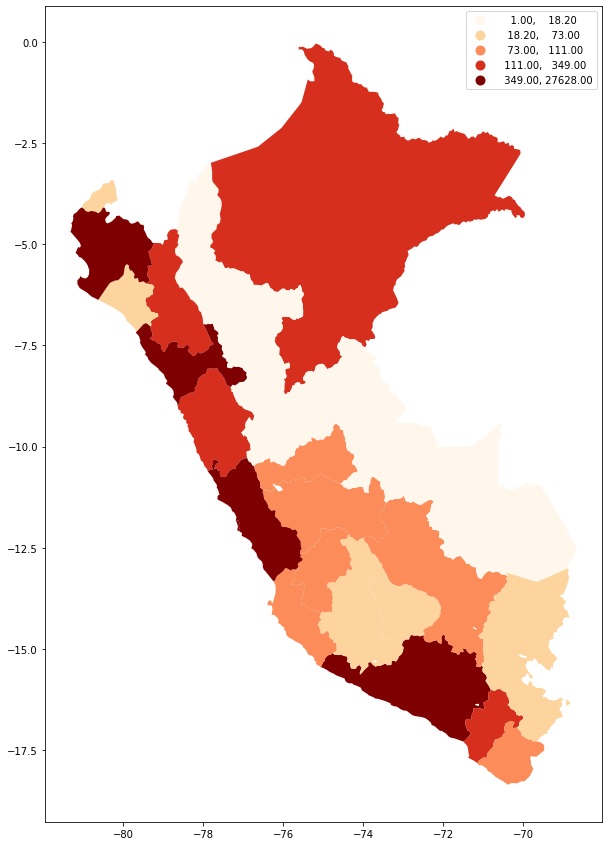

In [ ]:
ax = region_geojson.plot(column='Accidentes', cmap='OrRd', scheme='quantiles',figsize=(15, 15),legend=True)

In [ ]:
alt.Chart(region3).mark_arc().encode(
    theta=alt.Theta(field="ACCIDENTES DE TRABAJO", type="quantitative"),
    color=alt.Color(field="REGIÓN", type="nominal"),
)

alt.Chart(...)

Distribución  de los accidentes mortales por región.

In [ ]:
y = region3.groupby('REGIÓN')['ACCIDENTES MORTALES'].sum()
#y = pd.DataFrame(mapa_data)
y
#y = region3['ACCIDENTES MORTALES']
x = region3['REGIÓN'].unique()
z = y
# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

alt.Chart(...)

Distribución de los accidentes de trabajo (no mortales) por región.

In [ ]:
y = region3.groupby('REGIÓN')['ACCIDENTES DE TRABAJO'].sum()

y

x = region3['REGIÓN'].unique()
z = y
# Convert this grid to columnar data expected by Altair
source = pd.DataFrame({'x': x.ravel(),
                     'y': y.ravel(),
                     'z': z.ravel()})

alt.Chart(source).mark_rect().encode(
    x='x:O',
    y='y:O',
    color='z:Q'
)

alt.Chart(...)



---



---



NOTIFICACIONES DE ACCIDENTES DE TRABAJO POR ACTIVIDAD ECONÓMICA, SEGÚN AGENTE CAUSANTE

La mayoría de los agentes causantes de accidentes laborales corresponden al ítem "OTROS". sugiere la necedidad de replantar la calisificación para poder identificar las causas de los accidentes. En segundo lugar las herramientas portátiles pueden tener relación conque las zona más lesionada son los dedos.

In [ ]:
grafico_actividad2 = actividad_data2.sort_values(by='Total_actividad',ascending=False)
grafico_actividad2.head(5)

,Total_actividad
AGENTE CAUSANTE,
OTROS,43286
"HERRAMIENTAS (PORTÁTILES, MANUALES, MECÁNICOS, ELÉCTRICAS, NEUMÁTICAS, ETC.)",6776
MÁQUINAS Y EQUIPOS EN GENERAL,3358
PISO,3278
ESCALERA,3252


Cada sector debido a la naturaleza propia de sus actividades tiene agentes causantes diferentes.
En el caso de la Agricultura, Ganadería, Caza y Silvicultura después de otros la primera causa son las herramientas portátiles.

In [ ]:
actividad3.groupby('AGENTE CAUSANTE')['AGRICULT.,GANAD.,CAZA Y SILVIC.'].sum().sort_values(ascending=False).head(5)

AGENTE CAUSANTE
OTROS                                                                           223
HERRAMIENTAS (PORTÁTILES, MANUALES, MECÁNICOS, ELÉCTRICAS, NEUMÁTICAS, ETC.)     27
MÁQUINAS Y EQUIPOS EN GENERAL                                                    23
PISO                                                                             17
ESCALERA                                                                         13
Name: AGRICULT.,GANAD.,CAZA Y SILVIC., dtype: int64

En el caso de servicios sociales y salud el agente que sigue a OTROS es Piso y le sigue escaleras sugiriendo lesiones por caídas.

In [ ]:
actividad3.groupby('AGENTE CAUSANTE')['SERVICIOS SOCIALES Y DE SALUD'].sum().sort_values(ascending=False).head(5)

AGENTE CAUSANTE
OTROS                                                                           70
PISO                                                                            20
ESCALERA                                                                        19
HERRAMIENTAS (PORTÁTILES, MANUALES, MECÁNICOS, ELÉCTRICAS, NEUMÁTICAS, ETC.)    14
MÁQUINAS Y EQUIPOS EN GENERAL                                                    8
Name: SERVICIOS SOCIALES Y DE SALUD, dtype: int64



---



---



---

